### Salary Prediction Problem
- Data from **Glassdoor**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data
data = pd.read_csv('glassdoor_jobs.csv')
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


### Data Cleaning
- inorder to perform any kind of operations first we need to clean the data otherwise model says **garbage in = garbage out**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


- If you see the data, most of it refers to **categorical data**, so we must address this data and convert them into **numerical data** to feed our model

In [4]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
data.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [6]:
# take a copy of data and remove unnecessary attributes
emp_data = data.copy(deep= True)
emp_data.drop(columns= ['Unnamed: 0'], inplace = True)
emp_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
emp_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

### Job Title Handling

In [8]:
emp_data['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [9]:
# job title cleaning

def jobtitle_cleaner(title):
    if 'data scientist' in title.lower():
        return 'D-sci'
    elif 'data engineer' in title.lower():
        return 'D-eng'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ML'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'R&D'
    else:
        return 'na'

In [10]:
emp_data['JobTitles'] = emp_data['Job Title'].apply(jobtitle_cleaner)

In [11]:
emp_data['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [12]:
emp_data['JobTitles'].unique()

array(['D-sci', 'R&D', 'analyst', 'D-eng', 'na', 'director', 'ML',
       'manager'], dtype=object)

In [13]:
emp_data['JobTitles'].value_counts()

D-sci       358
na          219
D-eng       158
analyst     124
manager      36
ML           26
R&D          19
director     16
Name: JobTitles, dtype: int64

In [14]:
senior_list = ['sr','sr.','senior','principal', 'research', 'lead', 'R&D','II', 'III']
junior_list = ['jr','jr.','junior']


def jobseniority(title):
    for i in senior_list:
        if i in title.lower():
            return 'Senior Prof'
            
    for j in junior_list:
        if j in title.lower():
            return 'Junior Prof'
        else:
            return 'No Desc'
        

In [15]:
emp_data['Job Seniority'] = emp_data['Job Title'].apply(jobseniority)

In [16]:
emp_data['Job Seniority'].unique()

array(['No Desc', 'Senior Prof', 'Junior Prof'], dtype=object)

In [17]:
emp_data['Job Seniority'].value_counts()

No Desc        671
Senior Prof    283
Junior Prof      2
Name: Job Seniority, dtype: int64

### Job Description Handling

In [18]:
emp_data['Job Description'].unique()

array(['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to impro

In [19]:
# job descriptions
jobs_list = ['python', 'excel','r studio', 'spark','aws']

for i in jobs_list:
    emp_data[i+'_'+'job'] = emp_data['Job Description'].apply(lambda x : 1 if i in x.lower() else 0)

In [20]:
for i in jobs_list:
    print(emp_data[i+'_'+'job'].value_counts())

1    496
0    460
Name: python_job, dtype: int64
1    486
0    470
Name: excel_job, dtype: int64
0    955
1      1
Name: r studio_job, dtype: int64
0    742
1    214
Name: spark_job, dtype: int64
0    714
1    242
Name: aws_job, dtype: int64


### Company Name Handling

In [21]:
emp_data['Company Name'].unique()

array(['Tecolote Research\n3.8',
       'University of Maryland Medical System\n3.4', 'KnowBe4\n4.8',
       'PNNL\n3.8', 'Affinity Solutions\n2.9', 'CyrusOne\n3.4',
       'ClearOne Advantage\n4.1', 'Logic20/20\n3.8',
       'Rochester Regional Health\n3.3', '<intent>\n4.6', 'Wish\n3.5',
       'ManTech\n4.1', 'Walmart\n3.2', 'Yesler\n4.1',
       'Takeda Pharmaceuticals\n3.7', 'Audible\n3.6',
       'Blueprint Medicines\n3.9', 'h2o.ai\n4.3', 'Nuna\n4.2',
       'Pinnacol Assurance\n4.0', 'Porch\n3.2', 'Health IQ\n3.9',
       'Truckstop.com\n3.8', 'SMC 3\n4.3', 'Mars\n3.9', 'Novetta\n4.0',
       'Pfizer\n4.0', 'First Tech Federal Credit Union\n3.5',
       'The Hanover Insurance Group\n3.7', 'Amrock\n3.6', 'Novartis\n3.8',
       'Juniper Networks\n3.8', 'New England Biolabs\n4.7',
       'Clarity Insights\n4.2', 'Esri\n3.5',
       'Systems & Technology Research\n4.7', 'Sartorius\n3.5',
       'Lancer Insurance\n3.5', 'Sauce Labs\n4.2', 'Amount\n4.1',
       'Persivia\n3.6', 'Edgew

In [22]:
emp_data['Company Name'][0].split('\n')[0]

'Tecolote Research'

In [23]:
# remove numbers from company name
emp_data['Company Name'] = emp_data['Company Name'].apply(lambda x : x.split("\n")[0])
emp_data['Company Name'].value_counts()

Novartis                                           14
Takeda Pharmaceuticals                             14
MassMutual                                         14
Reynolds American                                  14
The Church of Jesus Christ of Latter-day Saints    13
                                                   ..
Centro                                              1
Amica Mutual                                        1
Sauce Labs                                          1
NMR Consulting                                      1
Redapt                                              1
Name: Company Name, Length: 448, dtype: int64

### Head quarters Handling

In [24]:
emp_data['Headquarters'].unique()

array(['Goleta, CA', 'Baltimore, MD', 'Clearwater, FL', 'Richland, WA',
       'New York, NY', 'Dallas, TX', 'Seattle, WA', 'Rochester, NY',
       'San Francisco, CA', 'Herndon, VA', 'Bentonville, AR',
       'OSAKA, Japan', 'Newark, NJ', 'Cambridge, MA', 'Mountain View, CA',
       'Denver, CO', 'New Plymouth, ID', 'Peachtree City, GA',
       'Mc Lean, VA', 'San Jose, CA', 'Worcester, MA', 'Detroit, MI',
       'Basel, Switzerland', 'Sunnyvale, CA', 'Ipswich, MA',
       'Chicago, IL', 'Redlands, CA', 'Woburn, MA', 'Gottingen, Germany',
       'Long Beach, NY', 'Lowell, MA', 'Shelton, CT', 'Alexandria, VA',
       'Foster City, CA', 'Omaha, NE', 'Chantilly, VA', 'Deerfield, IL',
       'London, United Kingdom', 'Fort Lauderdale, FL', 'Boston, MA',
       'Huntsville, AL', 'Zurich, Switzerland', 'Falls Church, VA',
       'Santa Clara, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'Holmdel, N

In [25]:
emp_data['Hquarters'] = emp_data['Headquarters'].str.split(',').str[1]
emp_data['Hquarters'].value_counts().head()

 CA    223
 MA    101
 NY     86
 VA     72
 IL     42
Name: Hquarters, dtype: int64

### Location Handling

In [26]:
emp_data['Location'].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

In [27]:
emp_data['loaction spots'] = emp_data['Location'].str.split(',').str[1]
emp_data['loaction spots'].value_counts().head()

 CA    210
 MA    124
 NY     96
 VA     56
 IL     48
Name: loaction spots, dtype: int64

### Compitators Handling

In [28]:
emp_data['Competitors'].unique()

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

In [29]:
emp_data['compitator company'] = emp_data['Competitors'].str.split(',').str[0].replace('-1', 'no compitator')

In [30]:
emp_data['compitator company'].value_counts()

no compitator                    634
Novartis                          14
Oak Ridge National Laboratory     12
Travelers                         11
Roche                              9
                                ... 
Frog Street Press                  1
Boeing                             1
Abbott Laboratories                1
Geometry Global                    1
McKim and Creed                    1
Name: compitator company, Length: 137, dtype: int64

### Type of ownership Handling

In [31]:
emp_data['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Contract', 'Unknown',
       'College / University', 'Private Practice / Firm', '-1',
       'School / School District'], dtype=object)

In [32]:
# def ownership_simplifier(text):
#     if 'private' in text.lower():
#         return 'Private'
#     elif 'public' in text.lower():
#         return 'Public'
#     elif ('-1' in text.lower()) or ('unknown' in text.lower()):
#         return 'Other Organization'
#     else:
#         return text

In [33]:
# efficient way
emp_data['Ownership'] = emp_data['Type of ownership'].str.split('-').str[1].replace(np.NaN, 'others')
emp_data['Ownership'].value_counts()

 Private    532
 Public     237
others      176
1            11
Name: Ownership, dtype: int64

### Revenue Handling

In [34]:
emp_data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [35]:
emp_data['Revenue'] = emp_data['Revenue'].str.replace('-1','others')

In [36]:
emp_data['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
others                               11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

### Size Handling

In [37]:
emp_data['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [38]:
emp_data['Size'] = emp_data['Size'].str.replace('-1','others')
emp_data['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
others                      11
Name: Size, dtype: int64

### Salary estimate Handling

In [39]:
emp_data["Salary Estimate"].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

In [40]:
emp_data['min_sal'] = emp_data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')


In [41]:
emp_data['min_sal'] = emp_data['min_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[0].str.replace('$','').str.replace('K','')


In [42]:
emp_data['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', 'Employer Provided Salary:150', '158', '20', '41', '111',
       '84', '107', '49', '61', '88', '60', '96', '65', '139', '50', '99',
       '79', '57', '94', '37', '100', '55', '39', '31', '117', '40', '89',
       '200', '121', '76', '91', '95', '43', '29', '26', '112', '51',
       '113', 'Employer Provided Salary:120', '59', '44', '124', '131',
       '132', '17', '42', '116', '48', '105', '98',
       'Employer Provided Salary:200', '21', '114', '108', '90', '138',
       '190', '35', '18', '69', '66', '15', '33', '62', '127', '78', '45',
       '70', '130', '92', 'Employer Provided Salary:85', '36', '97', '24',
       '202', '32', '87', 'Employer Provided Salary:25',
       'Employer Provided Salary:100', '101', '125',
       'Employer Provided Salary:1

In [43]:
emp_data['min_sal'] = emp_data['min_sal'].str.replace('Employer Provided Salary:','')
emp_data['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', '150', '158', '20', '41', '111', '84', '107', '49', '61',
       '88', '60', '96', '65', '139', '50', '99', '79', '57', '94', '37',
       '100', '55', '39', '31', '117', '40', '89', '200', '121', '76',
       '91', '95', '43', '29', '26', '112', '51', '113', '59', '44',
       '124', '131', '132', '17', '42', '116', '48', '105', '98', '21',
       '114', '108', '90', '138', '190', '35', '18', '69', '66', '15',
       '33', '62', '127', '78', '45', '70', '130', '92', '36', '97', '24',
       '202', '32', '87', '25', '101', '125', '10', '47', '176', '135',
       '129', '119', '27', '58', '136', '171'], dtype=object)

In [44]:
emp_data['max_sal'] = emp_data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')
emp_data['max_sal']

0       $53K-$91K ()
1      $63K-$112K ()
2       $80K-$90K ()
3       $56K-$97K ()
4      $86K-$143K ()
           ...      
951    $72K-$133K ()
952     $56K-$91K ()
953    $95K-$160K ()
954               -1
955    $61K-$126K ()
Name: max_sal, Length: 956, dtype: object

In [45]:
emp_data['max_sal'] = emp_data['max_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[1].str.replace('$','').str.replace('K','')


In [46]:
emp_data['max_sal'] = emp_data['max_sal'].str.replace('(Employer est.)','')

In [47]:
emp_data['max_sal'] = emp_data['max_sal'].str.split().str[0].str.replace('(','').str.replace(')','')

In [48]:
emp_data['max_sal'].unique()

array(['91', '112', '90', '97', '143', '119', '93', '142', '84', '160',
       '201', '106', '172', '85', '144', '190', '137', '189', '175',
       '111', '130', '139', '105', '1', '177', '110', '124', '61', '120',
       '149', '140', '135', '132', '180', '138', '129', '113', '150',
       '211', '39', '117', '99', '114', '95', '176', '146', '109', '148',
       '72', '161', '81', '220', '102', '122', '157', '222', '118', '141',
       '154', '76', '100', '68', '107', '65', '62', '231', '134', '116',
       '123', '73', '164', '153', '275', '71', '193', '163', '101', '133',
       '125', '173', '159', '50', '55', '182', '223', '145', '115', '136',
       '167', '204', '78', '207', '174', '80', '24', '82', '185', '198',
       '250', '34', '206', '183', '166', '179', '127', '224', '25', '66',
       '86', '92', '103', '64', '16', '199', '126', '63', '194', '74',
       '208', '162', '209', '89', '202', '57', '200', '196', '171', '306',
       '59', '158', '28', '155', '98', '96', '210'

In [49]:
emp_data['min_sal'] = pd.to_numeric(emp_data['min_sal'], errors='coerce')
type(emp_data['min_sal'])

pandas.core.series.Series

In [50]:
emp_data['min_sal'].isna().sum()

214

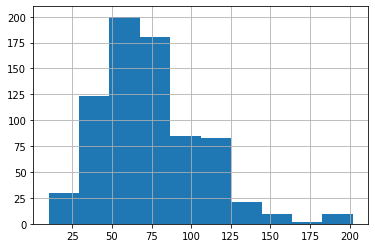

In [51]:
emp_data['min_sal'].hist()

In [52]:
emp_data['max_sal'].isna().sum()

0

In [53]:
emp_data['min_sal'] = emp_data['min_sal'].replace(np.nan, emp_data['min_sal'].mean())

In [54]:
emp_data['min_sal'].isna().sum()

0

In [55]:
emp_data['max_sal'] = pd.to_numeric(emp_data['max_sal'], errors='coerce')
type(emp_data['max_sal'])

pandas.core.series.Series

In [56]:
emp_data['max_sal'].isnull().sum()

0

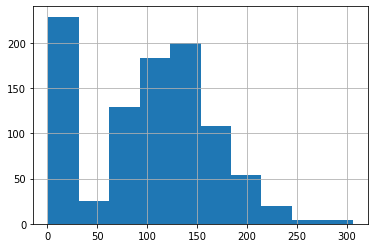

In [57]:
emp_data['max_sal'].hist()

In [58]:
emp_data['avg.salary'] = (emp_data['min_sal'] + emp_data['max_sal'])/ 2

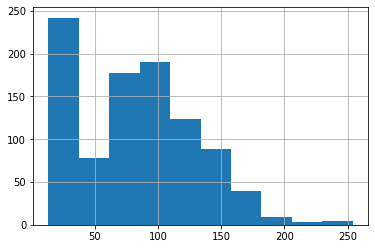

In [59]:
emp_data['avg.salary'].hist()

### Data gathering

In [60]:
emp_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,r studio_job,spark_job,aws_job,Hquarters,loaction spots,compitator company,Ownership,min_sal,max_sal,avg.salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,CA,NM,no compitator,Private,53.0,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,MD,MD,no compitator,others,63.0,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,FL,FL,no compitator,Private,80.0,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,WA,WA,Oak Ridge National Laboratory,others,56.0,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,NY,NY,Commerce Signals,Private,86.0,143,114.5


In [61]:
emp_data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'JobTitles', 'Job Seniority', 'python_job', 'excel_job', 'r studio_job',
       'spark_job', 'aws_job', 'Hquarters', 'loaction spots',
       'compitator company', 'Ownership', 'min_sal', 'max_sal', 'avg.salary'],
      dtype='object')

In [62]:
emp_data['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Food & Beverage Manufacturing', 'Telecommunications Services',
       'IT Services', 'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing',
       'Investment Banking & Asset Management',
       'Industrial Manufacturing', 'Staffing & Outsourcing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Wholesale', 'Mining',
       'Financial Analytics & Research', 'Federal Agencies',
       'Educa

In [63]:
emp_data['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Manufacturing', 'Telecommunications', '-1', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [64]:
final_data = emp_data[['Rating',
       'Company Name', 'Size',
       'Type of ownership','Sector', 'Revenue',
       'JobTitles', 'Job Seniority', 'python_job', 'excel_job', 'r studio_job',
       'spark_job', 'aws_job', 'Hquarters', 'loaction spots',
       'compitator company', 'Ownership','avg.salary']]
final_data.head()


,Rating,Company Name,Size,Type of ownership,Sector,Revenue,JobTitles,Job Seniority,python_job,excel_job,r studio_job,spark_job,aws_job,Hquarters,loaction spots,compitator company,Ownership,avg.salary
0,3.8,Tecolote Research,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),D-sci,No Desc,1,1,0,0,0,CA,NM,no compitator,Private,72.0
1,3.4,University of Maryland Medical System,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),D-sci,No Desc,1,0,0,0,0,MD,MD,no compitator,others,87.5
2,4.8,KnowBe4,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),D-sci,No Desc,1,1,0,1,0,FL,FL,no compitator,Private,85.0
3,3.8,PNNL,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),D-sci,No Desc,1,0,0,0,0,WA,WA,Oak Ridge National Laboratory,others,76.5
4,2.9,Affinity Solutions,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,D-sci,No Desc,1,1,0,0,0,NY,NY,Commerce Signals,Private,114.5


### Getting dummies

In [65]:
final_data = pd.get_dummies(data = final_data, columns = ['Company Name', 'Size', 'Type of ownership', 'Sector',
       'Revenue', 'JobTitles', 'Job Seniority','Hquarters', 'loaction spots',
       'compitator company', 'Ownership'])

In [66]:
final_data.head()

,Rating,python_job,excel_job,r studio_job,spark_job,aws_job,avg.salary,"Company Name_1-800-FLOWERS.COM, Inc.",Company Name_1904labs,Company Name_23andMe,...,compitator company_World Wide Technology,compitator company_YOOX NET-A-PORTER GROUP,compitator company_Zocdoc,compitator company_bluebird bio,compitator company_eClinicalWorks,compitator company_no compitator,Ownership_ Private,Ownership_ Public,Ownership_1,Ownership_others
0,3.8,1,1,0,0,0,72.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,3.4,1,0,0,0,0,87.5,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4.8,1,1,0,1,0,85.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3.8,1,0,0,0,0,76.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.9,1,1,0,0,0,114.5,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
final_data.columns

Index(['Rating', 'python_job', 'excel_job', 'r studio_job', 'spark_job',
       'aws_job', 'avg.salary', 'Company Name_1-800-FLOWERS.COM, Inc.',
       'Company Name_1904labs', 'Company Name_23andMe',
       ...
       'compitator company_World Wide Technology',
       'compitator company_YOOX NET-A-PORTER GROUP',
       'compitator company_Zocdoc', 'compitator company_bluebird bio',
       'compitator company_eClinicalWorks', 'compitator company_no compitator',
       'Ownership_ Private', 'Ownership_ Public', 'Ownership_1',
       'Ownership_others'],
      dtype='object', length=758)

### Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
final_data[['Rating', 'avg.salary']] = ms.fit_transform(final_data[['Rating', 'avg.salary']])

In [69]:
final_data.head()

,Rating,python_job,excel_job,r studio_job,spark_job,aws_job,avg.salary,"Company Name_1-800-FLOWERS.COM, Inc.",Company Name_1904labs,Company Name_23andMe,...,compitator company_World Wide Technology,compitator company_YOOX NET-A-PORTER GROUP,compitator company_Zocdoc,compitator company_bluebird bio,compitator company_eClinicalWorks,compitator company_no compitator,Ownership_ Private,Ownership_ Public,Ownership_1,Ownership_others
0,0.800000,1,1,0,0,0,0.243243,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.733333,1,0,0,0,0,0.307692,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.966667,1,1,0,1,0,0.297297,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.800000,1,0,0,0,0,0.261954,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.650000,1,1,0,0,0,0.419958,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
# split the data into attributes and lable
X = final_data.drop(columns= 'avg.salary').values
y = final_data.iloc[:, 6].values

### PCA

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [72]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09889051, 0.05501067])

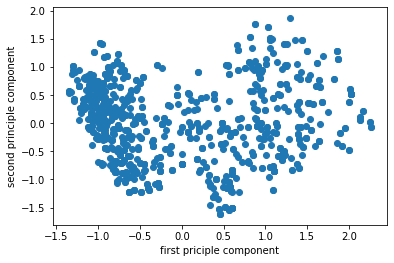

In [73]:
plt.scatter(x = X[:, 0], y= X[:, 1])
plt.xlabel('first priciple component')
plt.ylabel('second principle component')
plt.show()

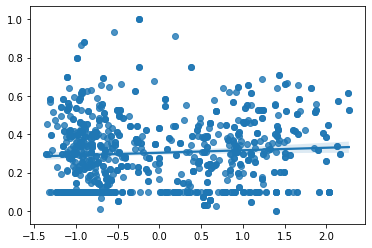

In [74]:
sns.regplot(x = X[:, 0], y = y)

*Quite sure that **linear regression won't fit** for this type of data cause **data involved lot of categorical features so Adaboost will be the best fit** but lets check*

### split the data into training and test set

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model selection

In [86]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'n_jobs': [-1]
            }
            
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(criterion='mse', random_state= 0),
            'parameters': {
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse', random_state= 0),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVR(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'Test score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','Test score'])

find_best_model(X_train, y_train)

,model,best_parameters,Test score
0,linear_regression,{'n_jobs': -1},0.159866
1,decision_tree,{'max_depth': 10},0.241827
2,random_forest,{'n_estimators': 200},0.447496
3,svm,"{'C': 10, 'kernel': 'linear'}",0.157994


In [77]:
# Creating linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
# Fitting the dataset to the model
lr_model.fit(X_train, y_train)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(lr_model.score(X_train, y_train),4)*100, round(lr_model.score(X_test, y_test),4)*100))


Accuracy of the Linear Regression Model on Training set is : 18.04% and on Test set is 22.400000000000002%


In [78]:
# Creating decision tree regression model
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0)
# Fitting the dataset to the model
decision_model.fit(X_train, y_train)
print("Accuracy of the Decision Tree Regression Model on Training set is : {}% and on Test set is {}%".format(round(decision_model.score(X_train, y_train),4)*100, round(decision_model.score(X_test, y_test),4)*100))

Accuracy of the Decision Tree Regression Model on Training set is : 74.41% and on Test set is 32.940000000000005%


In [79]:
# Creating random forest regression model
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0)
# Fitting the dataset to the model
forest_model.fit(X_train, y_train)
print("Accuracy of the Random Forest Regression Model on Training set is : {}% and on Test set is {}%".format(round(forest_model.score(X_train, y_train),4)*100, round(forest_model.score(X_test, y_test),4)*100))

Accuracy of the Random Forest Regression Model on Training set is : 92.54% and on Test set is 46.37%


In [80]:
# Creating AdaBoost regression model
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=0)
# Fitting the dataset to the model
adb_model.fit(X_train, y_train)
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(round(adb_model.score(X_train, y_train),4)*100, round(adb_model.score(X_test, y_test),4)*100))

Accuracy of the AdaBoost Regression Model on Training set is : 84.69% and on Test set is 43.24%


### Learning curves

In [97]:
X_train.shape

(764, 2)

In [98]:
train_sizes = [1, 100, 200, 300, 400, 500, 600, 700, 764]

In [99]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [109]:
print(train_scores.shape)
print(validation_scores.shape)

(9, 5)
(9, 5)


In [117]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print(pd.Series(train_scores_mean, index = train_sizes))
print(pd.Series(validation_scores_mean, index = train_sizes))

1     -0.000000
100    0.019147
200    0.022781
300    0.024799
400    0.024657
500    0.025526
600    0.026182
700    0.026067
764    0.026091
dtype: float64
1      0.034802
100    0.026817
200    0.026758
300    0.026379
400    0.026417
500    0.026360
600    0.026339
700    0.026360
764    0.026355
dtype: float64


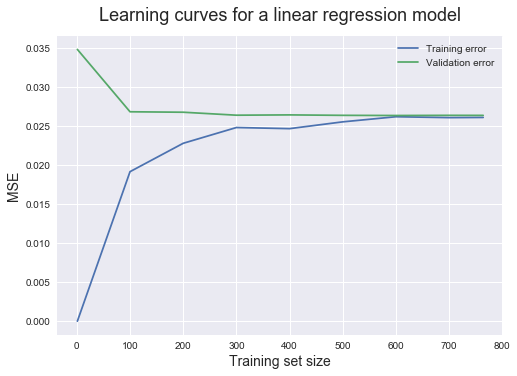

In [124]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [125]:
def learning_curves_fun(X,y, model):
    train_sizes = [1, 100, 200, 300, 400, 500, 600, 700, 764]
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

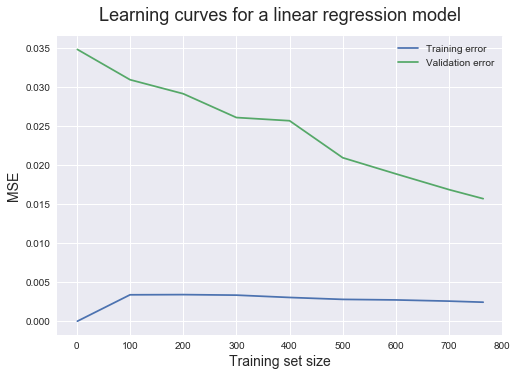

In [126]:
learning_curves_fun(X,y, RandomForestRegressor())

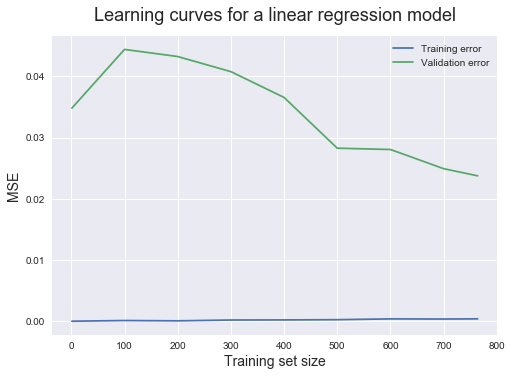

In [127]:
learning_curves_fun(X,y,DecisionTreeRegressor())

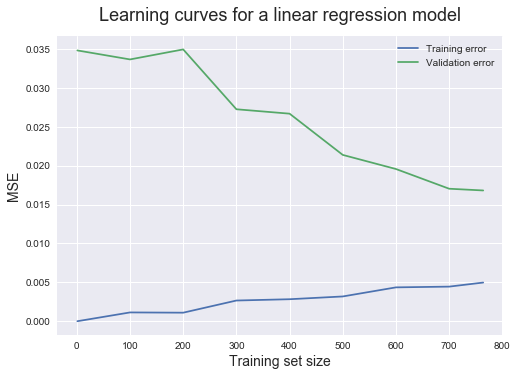

In [128]:
learning_curves_fun(X, y, AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=0))